# TODO:

- Mais um exemplo de otimização
- Adicionar mais textos na parte de fronteiras de decisão
- Adicionar mais dados na parte inicial da aula (inverno da IA e etc.)
- Expandir: teorema do aproximador universal

# Aula 6

---

**Saulo Martiello Mastelini**<br>
Candidato a Ph.D. pelo ICMC-USP<br>
Online Machine Learning

Página pessoal: [smastelini](https://smastelini.github.io/)</br>
e-mail: saulomastelini@gmail.com

---

## Sumário:

- Gradiente descendente
- Redes neurais artificias
- Multilayer Perceptron
- Visualização de fronteiras de decisão
- Cross-validation "na unha" (se der tempo)

---

# 1. Redes neurais artificiais

- Inspiração em estruturas biológicas
- Neurônios artificiais
    - Vários neurônios artificiais dispostos de forma organizada
    - Essas unidades interagem entre si
    - Em conjunto, resolvem as tarefas de aprendizado
- Redes neurais podem ser aplicadas a tarefas diversas

- Modelo perceptron foi proposto em 1943 por McCulloch e Pitts
    - Implementador pela primeira vez em 1958, por Frank Rosenblatt
    - Classificador binário linear
- Multi-layer Perceptron: vários neurônios perceptron
- Limitações da Perceptron e outras redes neurais primitivas: inverno da IA
    - Expectativas não-realísticas
    - Diminuição do interesse e investimentos
    - Novo _boom_ com deep learning

<img src="img/a6/neurons.png" width=800px>
    <figcaption>Fonte: Rukshan Pramoditha via <a href="https://towardsdatascience.com/the-concept-of-artificial-neurons-perceptrons-in-neural-networks-fab22249cbfc">Towards Data Science</a></figcaption>
</img>

**Redes neurais artificias são ferramentas poderosas e flexíveis:**

> _The universal approximation theorem for neural networks states that **every continuous function** that maps intervals of real numbers to some output interval of real numbers **can be approximated** arbitrarily closely by a **multi-layer perceptron** with just **one hidden layer**._

**Ingredientes das redes neurais (_feedforward_):**

<img src="img/a6/nn-receita.png" width=700px>
</img>

## 1.1. Otimização: Gradient Descent

- Otimização: primeira ordem
    - Utiliza a primeira derivada da função objetivo para encontrar os pontos máximos ou mínimos.

- Gradiente: indica a direção para a qual caminhar na função $f$ de forma a aumentar o falor de $f$ mais rapidamente.

- Gradiente em função multi-variada $f(x, y, \dots)$
    - Denotado por $\nabla f$
    - Vetor formado pelas derivadas parciais em todas as direções

$$
\nabla f = 
\begin{bmatrix}
\dfrac{\partial f}{\partial x}\\
\\
\dfrac{\partial f}{\partial y}\\
\vdots
\end{bmatrix}
$$

- O sinal do gradiente em um ponto indica se $f$ está aumentando ou diminuindo:
    - **Gradiente positivo:** a função está aumentando nesse ponto
    - **Gradiente negativo:** a função está diminuindo nesse ponto

- Se queremos encontrar os pontos de máximo de $f$, basta andar na direção do gradiente (**gradient ascent**)
- Se queremos os pontos de mínimo basta seguir na direção contrária do gradiente (**gradient descent**).


### 1.1.1. Receita para o gradiente descendente


1. **Função objetivo**
2. **Derivada da função objetivo**
3. **Critério de parada**
4. **Taxa de aprendizagem**

A atualização do $x$ é feita baseado na derivada em relação a $x$.

$$\tilde{x} = x - \alpha \dfrac{\partial f}{\partial x}$$

ou no caso unidimensional

$$\tilde{x} = x - \alpha f'(x)$$

### 1.1.2. Exemplo de aplicação

$$ f(x) = x^2 - 2x $$
$$ f'(x) = x - 2 $$


In [1]:
import random
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# f(x) = x^2 - 2x
def objective_function(x):
    return x ** 2 - 2 * x

# f'(x) = 2x - 2
def derivative_function(x):
    return 2 * x - 2

In [3]:
x = np.linspace(-1, 3, 1000)

fig = px.line(x=x, y=objective_function(x), width=800)
fig.show()

In [4]:
x = np.linspace(-1, 3, 1000)

fig = px.line(x=x, y=derivative_function(x), width=800)
fig.show()

In [5]:
def gradient_descent(obj, dev_obj, learning_rate, n_iter, bounds: tuple, seed: int = None):
    rng = random.Random(seed)

    x_min, x_max = bounds
    x_o = x_min + rng.random() * (x_max - x_min)

    yield None, x_o, obj(x_o), dev_obj(x_o)

    for i in range(n_iter):
        grad = dev_obj(x_o)
        x_o -= (learning_rate * grad)

        yield i, x_o, obj(x_o), grad

In [6]:
def plot_optim(x, y, seed):
    iters = []
    x_opt = []
    y_opt = []

    for i, x_o, ob, _ in gradient_descent(objective_function, derivative_function, 0.1, 100, (-1, 3), seed):
        iters.append("Inicio" if i is None else f"Iteração: {i}")
        x_opt.append(x_o)
        y_opt.append(ob)

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=x, y=y,
            mode="lines",
            name="Original"
        )
    )

    fig.add_trace(
        go.Scatter(
            x=x_opt, y=y_opt,
            mode="lines+markers",
            name="Otimização",
            hovertext=iters
        )
    )
    fig.update_layout(
        autosize=False,
        width=800,
        height=400,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
    )

    fig.show()

In [7]:
plot_optim(x, objective_function(x), 42)

In [8]:
plot_optim(x, objective_function(x), 43)

In [9]:
def gradient_descent2(obj, dev_obj, learning_rate, n_iter, etol, bounds: tuple, seed: int = None):
    rng = random.Random(seed)

    x_min, x_max = bounds
    x_o = x_min + rng.random() * (x_max - x_min)

    yield None, x_o, obj(x_o), dev_obj(x_o)

    for i in range(n_iter):
        grad = dev_obj(x_o)
        x_new = x_o - (learning_rate * grad)

        if abs(x_o - x_new) < etol:
            return
    
        x_o = x_new

        yield i, x_o, obj(x_o), grad


def plot_optim2(
        x, y, learning_rate=0.1, n_iter=100, etol=0.0001, seed=None,
        obj_f=objective_function, dev_f=derivative_function
    ):
    iters = []
    x_opt = []
    y_opt = []

    bounds = (min(x), max(x))

    for i, x_o, ob, _ in gradient_descent2(obj_f, dev_f, learning_rate, n_iter, etol, bounds, seed):
        iters.append("Inicio" if i is None else f"Iteração: {i}")
        x_opt.append(x_o)
        y_opt.append(ob)
    
    print(f"Parou com {i + 1} iterações")

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=x, y=y,
            mode="lines",
            name="Original"
        )
    )

    fig.add_trace(
        go.Scatter(
            x=x_opt, y=y_opt,
            mode="lines+markers",
            name="Otimização",
            hovertext=iters
        )
    )
    fig.update_layout(
        autosize=False,
        width=800,
        height=400,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
    )

    fig.show()

In [10]:
plot_optim2(x, objective_function(x), seed=43)

Parou com 37 iterações


In [11]:
plot_optim2(x, objective_function(x), seed=43, learning_rate=1)

Parou com 100 iterações


In [12]:
plot_optim2(x, objective_function(x), seed=43, learning_rate=0.9)

Parou com 47 iterações


In [13]:
plot_optim2(x, objective_function(x), seed=43, learning_rate=0.001)

Parou com 100 iterações


In [14]:
# Exemplo 2

def objective_function2(x):
    return x * np.cos(x)


def derivative_function2(x):
    return np.cos(x) - x * np.sin(x)

In [15]:
x2 = np.linspace(-10, 10, 1000)

fig = px.line(x=x2, y=objective_function2(x2), width=800)
fig.show()

In [16]:
fig = px.line(x=x2, y=derivative_function2(x2), width=800)
fig.show()

In [17]:
plot_optim2(
    x2, objective_function2(x2), seed=43, learning_rate=0.1,
    obj_f=objective_function2, dev_f=derivative_function2
)

Parou com 12 iterações


In [18]:
plot_optim2(
    x2, objective_function2(x2), seed=10, learning_rate=0.1,
    obj_f=objective_function2, dev_f=derivative_function2
)

Parou com 24 iterações


In [19]:
plot_optim2(
    x2, objective_function2(x2), seed=105, learning_rate=0.1,
    obj_f=objective_function2, dev_f=derivative_function2
)

Parou com 5 iterações


In [20]:
plot_optim2(
    x2, objective_function2(x2), seed=43, learning_rate=1,
    obj_f=objective_function2, dev_f=derivative_function2
)

Parou com 100 iterações


In [21]:
plot_optim2(
    x2, objective_function2(x2), seed=43, learning_rate=1.1,
    obj_f=objective_function2, dev_f=derivative_function2
)

Parou com 100 iterações


Vamos tentar ajudar o gradiente descendente:

In [22]:
def gradient_descent3(obj, dev_obj, learning_rate, decrease, n_iter, etol, bounds: tuple, seed: int = None):
    rng = random.Random(seed)

    x_min, x_max = bounds
    x_o = x_min + rng.random() * (x_max - x_min)

    yield None, x_o, obj(x_o), dev_obj(x_o)

    for i in range(1, n_iter + 1):
        grad = dev_obj(x_o)
        x_new = x_o - (learning_rate * grad)

        if abs(x_o - x_new) < etol:
            return
    
        # Mudança aqui
        if x_new < x_min:
            x_new = x_min
        elif x_new > x_max:
            x_new = x_max
        else:
            x_o = x_new

        # Mudança aqui:
        learning_rate /= (i ** decrease)

        yield i, x_o, obj(x_o), grad


def plot_optim3(
        x, y, learning_rate=0.1, decrease=0.5, n_iter=100, etol=0.0001, seed=None,
        obj_f=objective_function, dev_f=derivative_function
    ):
    iters = []
    x_opt = []
    y_opt = []

    bounds = (min(x), max(x))

    for i, x_o, ob, _ in gradient_descent3(obj_f, dev_f, learning_rate, decrease, n_iter, etol, bounds, seed):
        iters.append("Inicio" if i is None else f"Iteração: {i}")
        x_opt.append(x_o)
        y_opt.append(ob)
    
    print(f"Parou com {i} iterações")

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=x, y=y,
            mode="lines",
            name="Original"
        )
    )

    fig.add_trace(
        go.Scatter(
            x=x_opt, y=y_opt,
            mode="lines+markers",
            name="Otimização",
            hovertext=iters
        )
    )
    fig.update_layout(
        autosize=False,
        width=800,
        height=400,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
    )

    fig.show()

In [23]:
plot_optim3(
    x2, objective_function2(x2), seed=43, learning_rate=5,
    obj_f=objective_function2, dev_f=derivative_function2
)

Parou com 14 iterações


In [24]:
plot_optim3(
    x2, objective_function2(x2), seed=43, learning_rate=10,
    obj_f=objective_function2, dev_f=derivative_function2,
    decrease=0.2
)

Parou com 18 iterações


In [25]:
plot_optim3(
    x2, objective_function2(x2), seed=43, learning_rate=10,
    obj_f=objective_function2, dev_f=derivative_function2,
    decrease=0.5
)

Parou com 13 iterações


## 1.2. Neurônios artificiais e funções de ativação

- Sigmoid/Logistic

    $$f(x) = \dfrac{1}{1 + e^{-x}}$$

    - Produz valores entre [0, 1]
    - Derivada: $f^{'}(x) = \text{sigmoid}(x) \times (1 - \text{sigmoid}(x))$

- Tangente hiperbólica
    - Parecida com a sigmoide, mas tem o range entre [-1, 1]

- Ambas possuem o problema de _vanishing gradient_
    - Muito do seu domínio possui gradiente zero

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def dev_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [27]:
x = np.linspace(-10, 10, 200)
y = np.array([sigmoid(v) for v in x])

In [28]:
px.scatter(x=x, y=y, width=800)

In [29]:
y_ = np.array([dev_sigmoid(v) for v in x])
px.scatter(x=x, y=y_, width=800)

- Atualmente, ReLu (_Rectified Linear Unit_) ou alguma de suas variáveis são a escolha mais popular
    $$f(x) = max(0, x)$$

    - Simples e computacionalmente barata de se calcular
    - Em termos de otimização, também é mais simples

In [30]:
def relu(x):
    return max(0, x)


def dev_relu(x):
    return 1 if x >= 0 else 0

In [31]:
y = np.array([relu(v) for v in x])

px.scatter(x=x, y=y, width=800)

In [32]:
y_ = np.array([dev_relu(v) for v in x])

px.scatter(x=x, y=y_, width=800)

- Como todos os valores menores do zero tem gradiente nulo, durante a atualização da rede, alguns neurônios podem não ser atualizados
- Existe uma série de variações da ReLU que buscam mitigar seus problemas, enquanto mantendo as suas vantagens
- Lista de funções de ativação:

<img src="img/a6/activation.jpeg" height=1000px>
    <figcaption>Funções de ativação. Fonte: <a href="https://www.v7labs.com/blog/neural-networks-activation-functions">V7 Labs</a></figcaption>
</img>

## 1.3. Função de perda

- Função que queremos otimizar (erro)
- No exemplo inicial consideramos algumas funções para as quais sabemos a derivada
- O mesmo vale para as funções de _loss_ ou perda
- Uma das funções de perda mais utilizadas é o Mean Squared Error (MSE) - regressão
    - Esse mesmo! Que vimos nas métricas de avaliação de regressão
    - Uma pequena simplicação para facilitar
$$MSE(y, \hat{y}) = \dfrac{1}{2N}\sum_{i=1}^N (y_i - \hat{y}_i)^2$$

- Outras funções: Binary/Categorical Cross-Entropy: classificação

<img src="img/a6/bin-cross-entropy.webp" width=700px>
    <figcaption>
        Binary Cross-Entropy. Fonte: Vishal Yathish via <a href="https://towardsdatascience.com/loss-functions-and-their-use-in-neural-networks-a470e703f1e9#:~:text=A%20loss%20function%20is%20a,the%20predicted%20and%20target%20outputs.">Towards Data Science</a>
    </figcaption>
</img>

- y: distribução real das classes (ou 0 ou 1)
- p: probabilidade predita (entre 0 e 1)


## 1.4. Arquitetura de uma rede neural 

- Componentes das redes neurais:
    - Camada de entrada
        - Correspondem aos atributos de entrada do problema (`X`)
    - Camada(s) oculta(s)/escondida(s)
        - O número e quantidade de neurônios por camada pode variar
        - Definido pelo usuário
    - Camada de saída
        - Varia de acordo com o problema
        - Exemplos:
            - Um neurônio para tarefas de classificação binária (ativação sigmoide) ou regressão (ativação linear)
            - Um neurônio por classe para classificação multiclasses (ativação softmax)
                - $\text{Softmax}(\mathbf{z})_i = \dfrac{e^{z_i}}{\sum_{j=0}^N e^{z_j}}$
                - Normaliza as saídas e as transforma em probabilidades
- Exemplo de diagrama de uma rede neural:

<img src="img/a6/ann.jpeg" width=500px>
    <figcaption>Uma rede neural artificial. Fonte: <a href="https://www.v7labs.com/blog/neural-networks-activation-functions">V7 Labs</a></figcaption>
</img>

### 1.4.1. Multi-layer Perceptron

- Uma das redes neurais artificiais mais populares e básicas
    - Predecessora de muitas redes modernas
- Rede _feedforward_: dados seguem um fluxo sem recorrências
    - Recorrencia = "retroalimentação" da rede
- Aproximador universal de funções!

### 1.4.2. Outros conceitos importantes para redes neurais

- Época/epoca
    - "Passada" completa nos dados de treinamento
    - A ordem importa! É usual embaralhar os dados antes de cada rodada
- Dropout: regularização das redes
    - Desabilita alguns pesos durante o processo de otimização para encorajar a rede a se adaptar e, assim, evitar _overfitting_

## 1.5. Atualização dos pesos

- _Backpropagation_: calcula o erro no final da rede. Propaga atualizações nos pesos da rede, partindo da camada de saída até a camada de entrada
    - Utiliza a regra da cadeia das derivadas para estimar como cada peso de neurônio contribui para o erro total da rede

<img src="img/a6/mlp.png" width=400px></img>

- Pitada do funcionamento do backpropagation: derivada do erro, em relação a um peso da camada oculta
    - $w_{io}$: peso saindo do $i$-ésimo neurônio da camada oculta e indo para o neurônio da camada de saída
    - $a_o$: ativação do neurônio da camada de saída
        - Combinação linear dos pesos vezes as entradas + o bias
    $$\dfrac{\partial E}{\partial w_{io}} = \dfrac{\partial E}{\partial a_o}\dfrac{\partial a_o}{\partial w_{io}}$$
    - A variação do erro da rede em relação a um peso é igual a:
        1. A variação do erro em relação à ativação do neurônio onde o peso está $\times$
        2. A variação da ativação em relação ao peso
    
    - A regra da cadeia é aplicada para determinar a derivada do erro em relação a cada parâmetro (peso) da rede
    - O processo de cálculo dos gradientes é recursivo
        - Começa do final
        - A medida que as derivadas para as últimas camadas são encontradas, seus valores são substituídos nas expressões das camadas anteriores
- Tudo precisa ser derivável (uma vez)!

- Para a explicação completa do Backpropagation, consultar esse ótimo [material](https://brilliant.org/wiki/backpropagation/).

# 2. Testando a MLP do sklearn: fronteiras de decisão

- Notas:
    - Por padrão a MLP do sklearn usa o otimizador "Adam"
        - Variante do gradiente descendente
    - `max_iter` (para os otimizadores "adam" e "sgd" -- _stochastic gradient descent_) define a quantidade de épocas máximas

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [34]:
# Adaptado de: https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py
def plot_decision_boundaries(X, y, model):
    from matplotlib import colormaps
    import matplotlib.markers as mmarkers
    def mscatter(x, y, ax=None, m=None, **kw):
        if not ax: ax=plt.gca()
        sc = ax.scatter(x,y,**kw)
        if (m is not None) and (len(m)==len(x)):
            paths = []
            for marker in m:
                if isinstance(marker, mmarkers.MarkerStyle):
                    marker_obj = marker
                else:
                    marker_obj = mmarkers.MarkerStyle(marker)
                path = marker_obj.get_path().transformed(
                            marker_obj.get_transform())
                paths.append(path)
            sc.set_paths(paths)
        return sc

    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")

    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Right now it only works with binary tasks: expand both dictionaries or use cmap for multiclass tasks

    cmap = colormaps['brg']

    markers = {0: "o", 1: "^", 2: "s", 3: "D", 4: "+", 5: "*"}

    m = list(map(lambda i: markers[i], y))
    
    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    mscatter(x=X[:, 0], y=X[:, 1], c=y, m=m, cmap=cmap, alpha=1)
    
    plt.xlabel("x1",fontsize=15)
    plt.ylabel("x2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    return plt

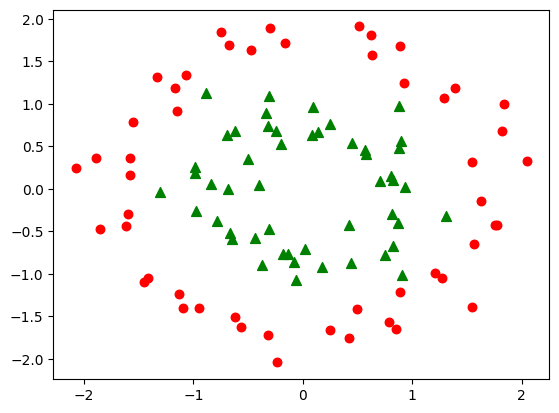

In [35]:
X_orig, y = make_circles(n_samples=100, factor = 0.5, noise = 0.1, random_state = 42)

X = StandardScaler().fit_transform(X_orig)

colors = ["red", "green"]
markers = [".", "^"]
sizes = [150, 50]
for c in np.unique(y):
    mask = y == c
    plt.scatter(X[mask, 0], X[mask, 1], color=colors[c], marker=markers[c], s=sizes[c])
plt.show()

Vamos estar uma MLP que possui apenas um neurônio:

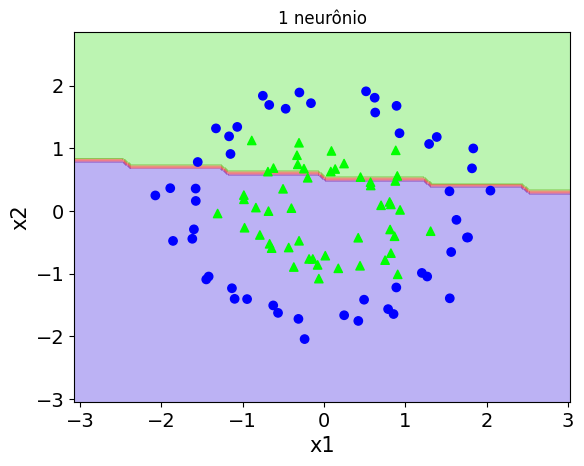

In [36]:
plot_decision_boundaries(X, y, MLPClassifier(hidden_layer_sizes = (1), max_iter = 5000, random_state = 42))
plt.title("1 neurônio")
plt.show()

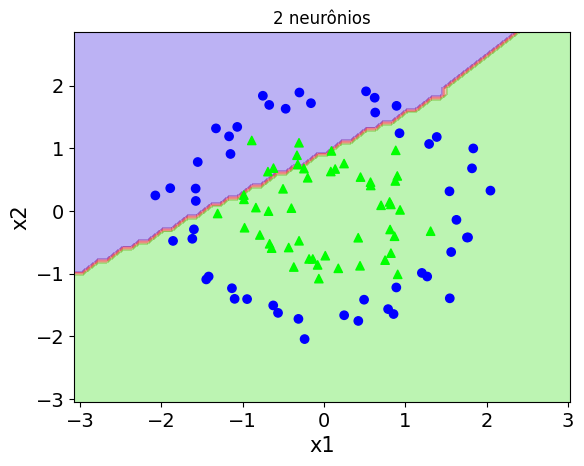

In [37]:
plot_decision_boundaries(X, y, MLPClassifier(hidden_layer_sizes = (2), max_iter = 5000, random_state = 42))
plt.title("2 neurônios")
plt.show()

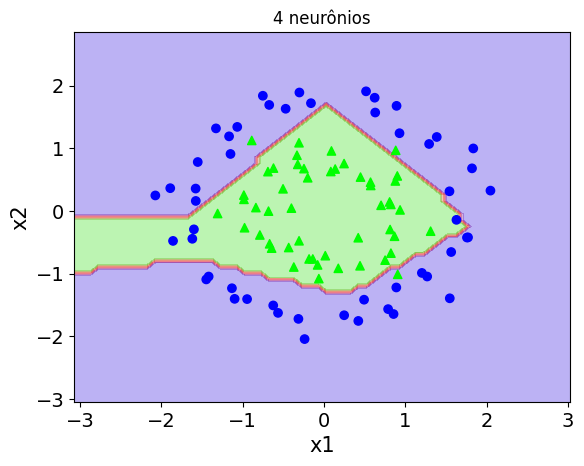

In [38]:
plot_decision_boundaries(X, y, MLPClassifier(hidden_layer_sizes = (4), max_iter = 5000, random_state = 42))
plt.title("4 neurônios")
plt.show()

Podemos mudar a função de ativação:

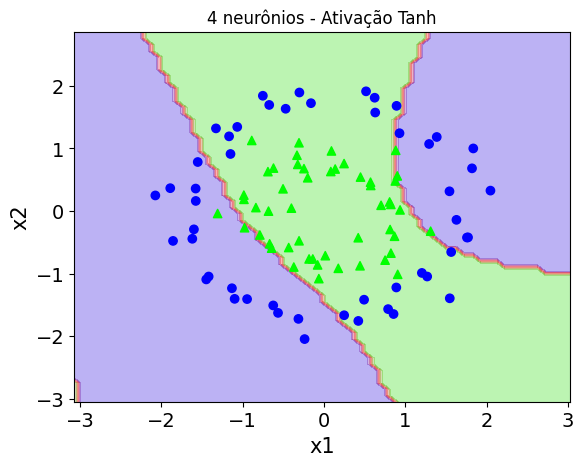

In [39]:
plot_decision_boundaries(X, y, MLPClassifier(hidden_layer_sizes = (4), activation="tanh", max_iter = 5000, random_state = 43))
plt.title("4 neurônios - Ativação Tanh")
plt.show()

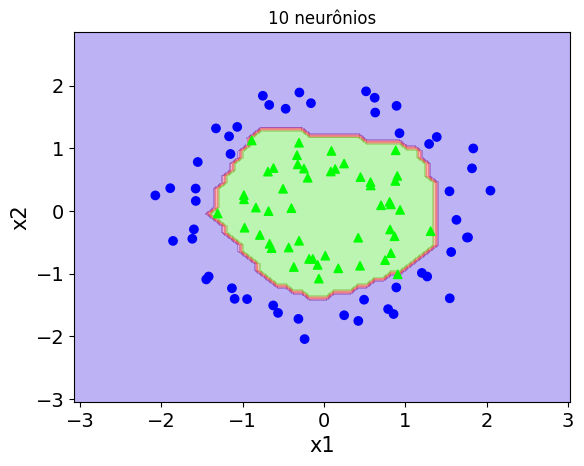

In [40]:
plot_decision_boundaries(X, y, MLPClassifier(hidden_layer_sizes = (10), max_iter = 5000, random_state = 42))
plt.title("10 neurônios")
plt.show()

Hora de complicar as coisas:

- Cria um outro problema onde os pontos estão mais concentrados no meio
- Transfere esse miolo para o problema anterior (com as labels trocadas)

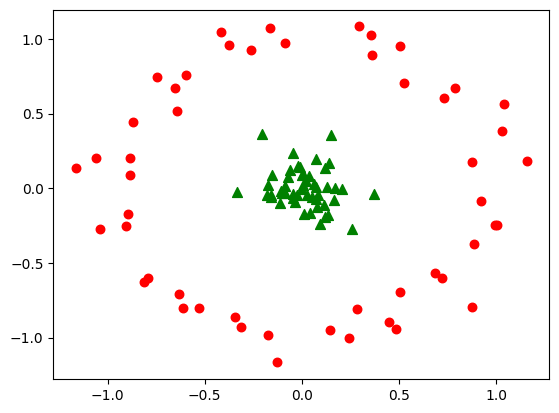

In [41]:
X_in, y_in = make_circles(n_samples=100, factor = 0.1, noise = 0.1, random_state = 42)

colors = ["red", "green"]
markers = [".", "^"]
sizes = [150, 50]
for c in np.unique(y_in):
    mask = y_in == c
    plt.scatter(X_in[mask, 0], X_in[mask, 1], color=colors[c], marker=markers[c], s=sizes[c])
plt.show()

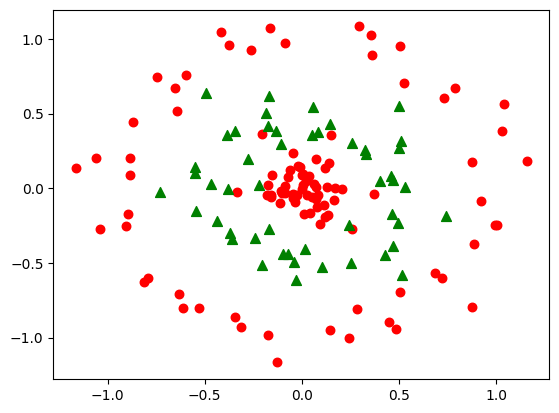

In [42]:
# Pega o X interno
mask = (y_in == 1)
X_in = X_in[mask]

# Inverte a label do miolo
y_in = np.zeros(len(y_in[mask]))

X2 = np.concatenate((X_orig, X_in), axis=0,)
y2 = np.concatenate((y, y_in), axis=0)

colors = ["red", "green"]
markers = [".", "^"]
sizes = [150, 50]
for c in [0, 1]:
    mask = y2 == c
    plt.scatter(X2[mask, 0], X2[mask, 1], color=colors[c], marker=markers[c], s=sizes[c])
plt.show()

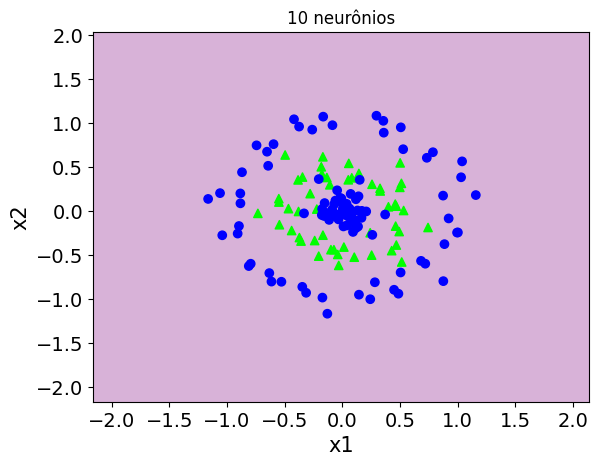

In [43]:
plot_decision_boundaries(X2, y2, MLPClassifier(hidden_layer_sizes=(10,), max_iter=5000, random_state = 42))
plt.title("10 neurônios")
plt.show()

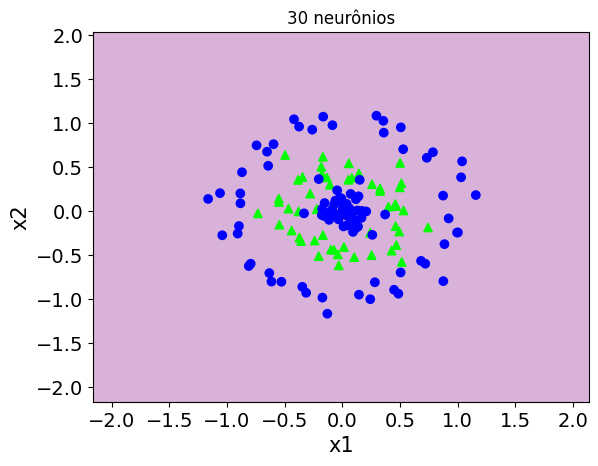

In [44]:
plot_decision_boundaries(X2, y2, MLPClassifier(hidden_layer_sizes=(30,), max_iter=5000, random_state = 42))
plt.title("30 neurônios")
plt.show()

Intuição que me foi dada pelo professor André C. P. L. F. de Carvalho:
- A primeira camada cria retas
- A segunda é capaz de criar regiões convexas

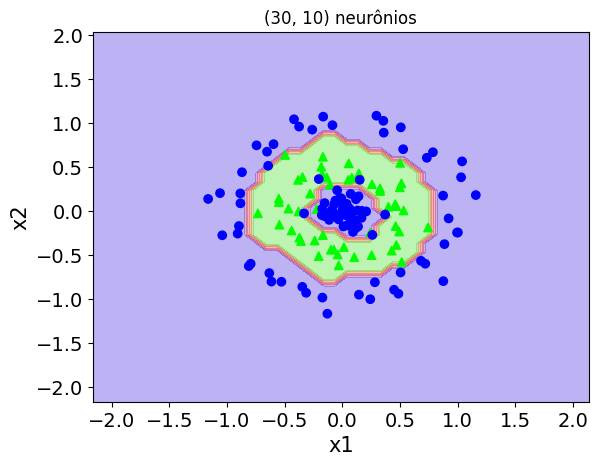

In [45]:
plot_decision_boundaries(X2, y2, MLPClassifier(hidden_layer_sizes=(30,10), max_iter=5000, random_state = 42))
plt.title("(30, 10) neurônios")
plt.show()

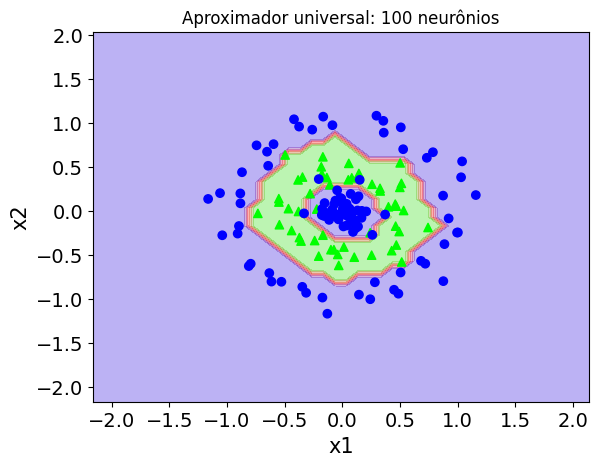

In [46]:
plot_decision_boundaries(X2, y2, MLPClassifier(hidden_layer_sizes=(100,), max_iter=5000, random_state = 42))
plt.title("Aproximador universal: 100 neurônios")
plt.show()

Ou podemos não esquecer de escalar os dados XD

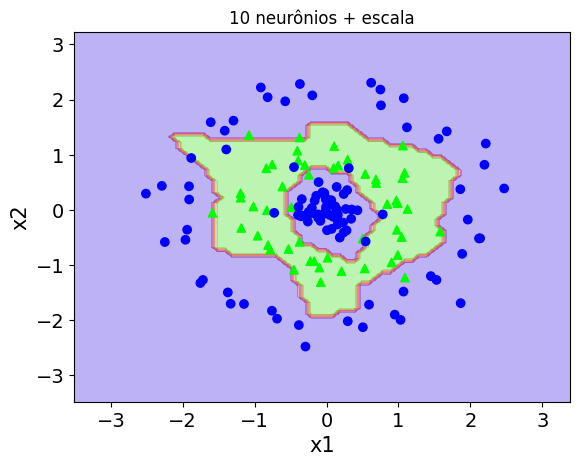

In [47]:
X2_scaled = StandardScaler().fit_transform(X2)

plot_decision_boundaries(X2_scaled, y2, MLPClassifier(hidden_layer_sizes=(10,), max_iter=5000, random_state = 42))
plt.title("10 neurônios + escala")
plt.show()

## 2.1. _Overfitting_ e _underfitting_

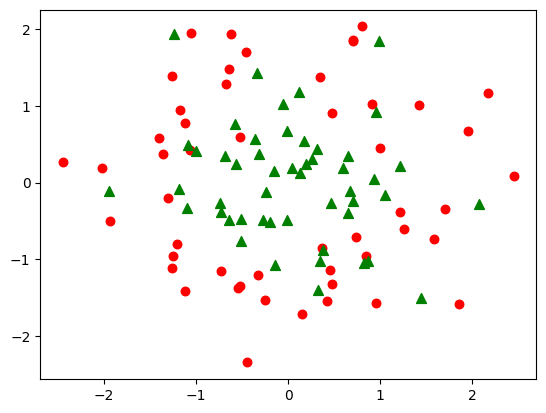

In [48]:
X_ruido, y_ruido = make_circles(n_samples=100, factor = 0.5, noise = 0.3, random_state = 42)
X_ruido = StandardScaler().fit_transform(X_ruido)

colors = ["red", "green"]
markers = [".", "^"]
sizes = [150, 50]
for c in [0, 1]:
    mask = y_ruido == c
    plt.scatter(X_ruido[mask, 0], X_ruido[mask, 1], color=colors[c], marker=markers[c], s=sizes[c])
plt.show()

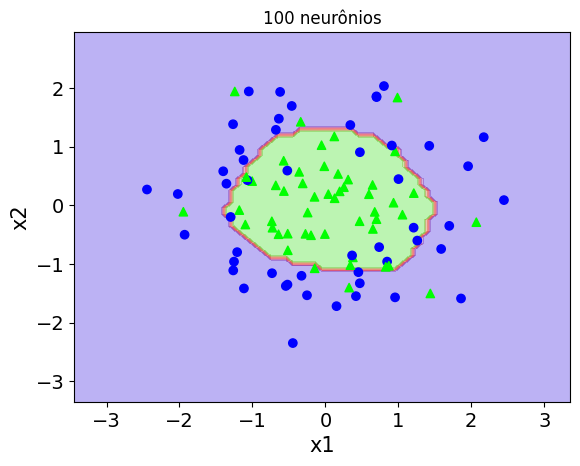

In [49]:
plot_decision_boundaries(X_ruido, y_ruido, MLPClassifier(hidden_layer_sizes=(100,), max_iter=5000, random_state = 42))
plt.title("100 neurônios")
plt.show()

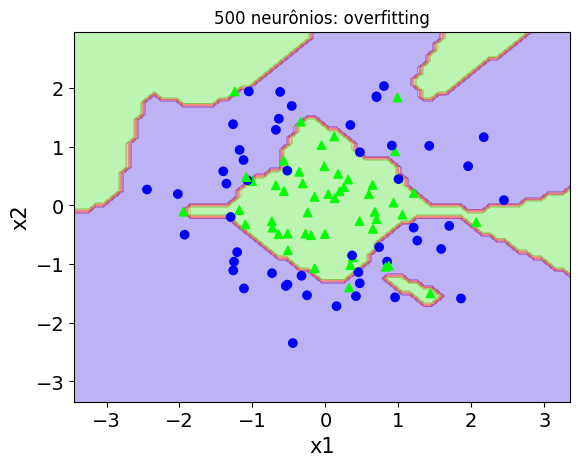

In [50]:
plot_decision_boundaries(X_ruido, y_ruido, MLPClassifier(hidden_layer_sizes=(500), max_iter=5000, random_state = 42))
plt.title("500 neurônios: overfitting")
plt.show()

- Podemos adicionar regularização, assim como na regressão linear.
- A MLP do sklearn suporta regularização L2
    - Parâmetro `alpha`

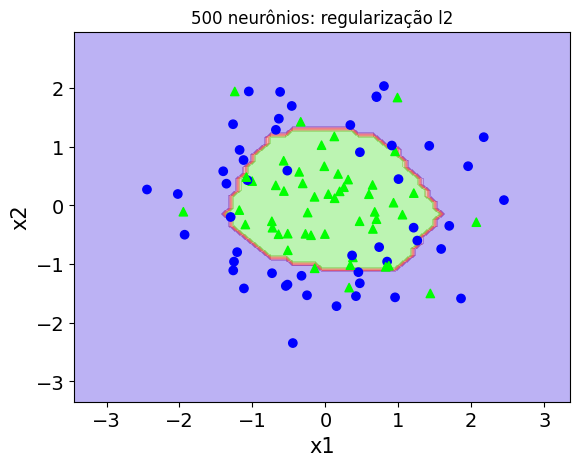

In [51]:
plot_decision_boundaries(X_ruido, y_ruido, MLPClassifier(hidden_layer_sizes=(500), max_iter=5000, alpha=0.1, random_state = 42))
plt.title("500 neurônios: regularização l2")
plt.show()

Mas também não dá para exagerar :D

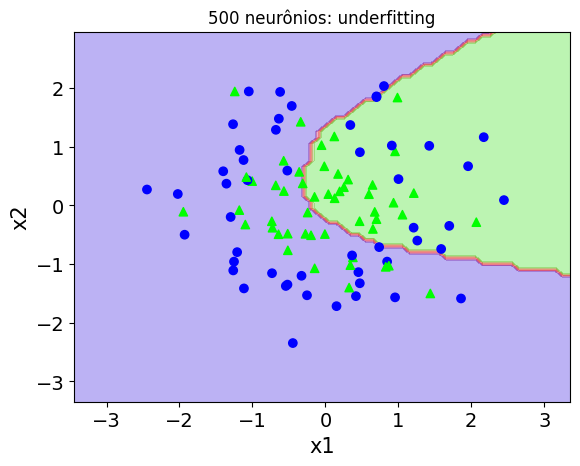

In [52]:
plot_decision_boundaries(X_ruido, y_ruido, MLPClassifier(hidden_layer_sizes=(500), max_iter=5000, alpha=10, random_state = 42))
plt.title("500 neurônios: underfitting")
plt.show()

- Notem que nesses exemplos eu não lidei com a taxa de aprendizagem
- Dois parâmetros notáveis no sklearn:
    - `learning_rate_init`: define o valor da taxa de aprendizado
    - `learning_rate`: string que representa a estratégia utilizada para atualização da taxa de aprendizado
        - `"constant"`: mantém seu valor constante o tempo todo
        - `"invscaling"`: decresce exponencialmente o valor da taxa de aprendizado a medida que o treinamento ocorre
        - `"adaptive"`: mantém o valor da taxa de aprendizado constante. Se por duas épocas seguidas não diminuírem o erro significativamente, divide a taxa de aprendizado por 5.

- Você pode aprender mais sobre os parâmetros disponíveis e ver mais detalhes na [documentação oficial do sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

# 3. Cross-validation revisitado

# Tarefa